In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta
import datetime

In [2]:
df = yf.download('RELIANCE.NS', '2010-01-01', '2021-06-18')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,540.427307,540.427307,506.127411,532.700500,484.266144,35372156
2010-01-05,569.551208,569.551208,527.697937,530.323059,482.104797,9872785
2010-01-06,534.879883,542.111328,530.298279,538.891846,489.894440,10933743
2010-01-07,538.891846,552.265076,533.938782,547.832092,498.021881,12090336
2010-01-08,548.797974,551.670715,542.854309,546.395691,496.716003,6973331
...,...,...,...,...,...,...
2021-06-11,2182.899902,2228.000000,2180.100098,2213.149902,2213.149902,6351520
2021-06-14,2215.000000,2258.250000,2195.050049,2244.899902,2244.899902,9383416
2021-06-15,2261.000000,2274.899902,2240.300049,2250.000000,2250.000000,7002898


In [3]:
df['ema50'] = ta.EMA(df['Close'], timeperiod = 50)
df['ema200'] = ta.EMA(df['Close'], timeperiod = 200)
df = df.dropna()
df


,Open,High,Low,Close,Adj Close,Volume,ema50,ema200
Date,,,,,,,,
2010-10-19,527.499817,529.332458,514.745728,517.296570,473.471741,8574490,504.030538,512.372224
2010-10-20,514.820007,527.202637,514.126587,519.797852,475.761078,8414451,504.648864,512.446111
2010-10-21,521.060852,538.817566,519.674011,535.746643,490.358734,17201550,505.868385,512.677957
2010-10-22,537.628845,541.764587,532.130920,535.820923,490.426727,9057986,507.042994,512.908235
2010-10-25,538.891846,545.776611,537.901245,540.055786,494.302826,8315835,508.337613,513.178360
...,...,...,...,...,...,...,...,...
2021-06-11,2182.899902,2228.000000,2180.100098,2213.149902,2213.149902,6351520,2054.137751,1974.008054
2021-06-14,2215.000000,2258.250000,2195.050049,2244.899902,2244.899902,9383416,2061.618620,1976.703495
2021-06-15,2261.000000,2274.899902,2240.300049,2250.000000,2250.000000,7002898,2069.006125,1979.422864


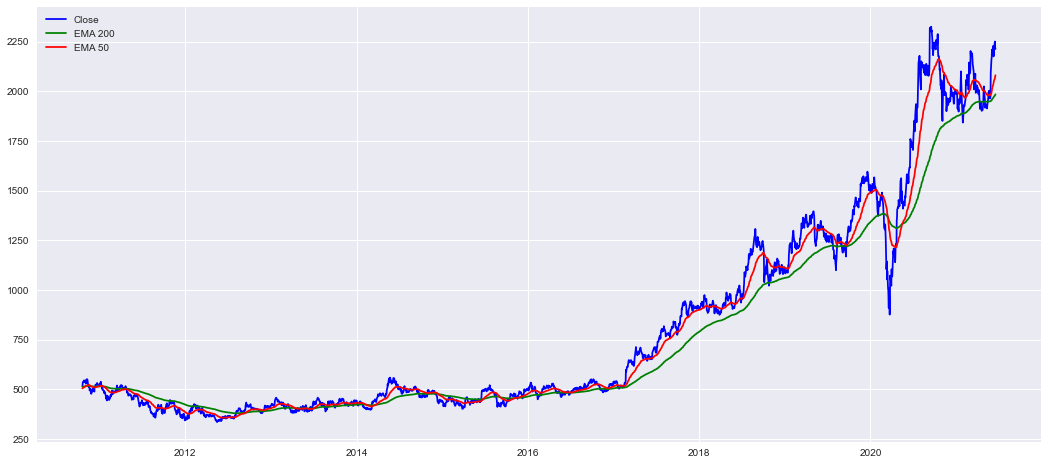

In [4]:
%matplotlib inline

plt.figure(figsize = (18,8))
plt.style.use('seaborn')
plt.plot(df['Close'], label = 'Close', color = 'b')
plt.plot(df['ema200'], label = 'EMA 200', color= 'g')
plt.plot(df['ema50'], label = 'EMA 50', color='r')
plt.legend()
plt.show()

In [5]:
df['position'] = np.where(df['ema50']>df['ema200'], 1, 0)
df

<ipython-input-5-42d8c4e9abe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = np.where(df['ema50']>df['ema200'], 1, 0)


,Open,High,Low,Close,Adj Close,Volume,ema50,ema200,position
Date,,,,,,,,,
2010-10-19,527.499817,529.332458,514.745728,517.296570,473.471741,8574490,504.030538,512.372224,0
2010-10-20,514.820007,527.202637,514.126587,519.797852,475.761078,8414451,504.648864,512.446111,0
2010-10-21,521.060852,538.817566,519.674011,535.746643,490.358734,17201550,505.868385,512.677957,0
2010-10-22,537.628845,541.764587,532.130920,535.820923,490.426727,9057986,507.042994,512.908235,0
2010-10-25,538.891846,545.776611,537.901245,540.055786,494.302826,8315835,508.337613,513.178360,0
...,...,...,...,...,...,...,...,...,...
2021-06-11,2182.899902,2228.000000,2180.100098,2213.149902,2213.149902,6351520,2054.137751,1974.008054,1
2021-06-14,2215.000000,2258.250000,2195.050049,2244.899902,2244.899902,9383416,2061.618620,1976.703495,1
2021-06-15,2261.000000,2274.899902,2240.300049,2250.000000,2250.000000,7002898,2069.006125,1979.422864,1


<ipython-input-6-5db9b243a37e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Open,High,Low,Close,Adj Close,Volume,ema50,ema200,position
Date,,,,,,,,,
2010-10-19,527.499817,529.332458,514.745728,517.296570,473.471741,8574490,504.030538,512.372224,0
2010-10-20,514.820007,527.202637,514.126587,519.797852,475.761078,8414451,504.648864,512.446111,0
2010-10-21,521.060852,538.817566,519.674011,535.746643,490.358734,17201550,505.868385,512.677957,0
2010-10-22,537.628845,541.764587,532.130920,535.820923,490.426727,9057986,507.042994,512.908235,0
2010-10-25,538.891846,545.776611,537.901245,540.055786,494.302826,8315835,508.337613,513.178360,0
...,...,...,...,...,...,...,...,...,...
2021-06-11,2182.899902,2228.000000,2180.100098,2213.149902,2213.149902,6351520,2054.137751,1974.008054,1
2021-06-14,2215.000000,2258.250000,2195.050049,2244.899902,2244.899902,9383416,2061.618620,1976.703495,1
2021-06-15,2261.000000,2274.899902,2240.300049,2250.000000,2250.000000,7002898,2069.006125,1979.422864,1


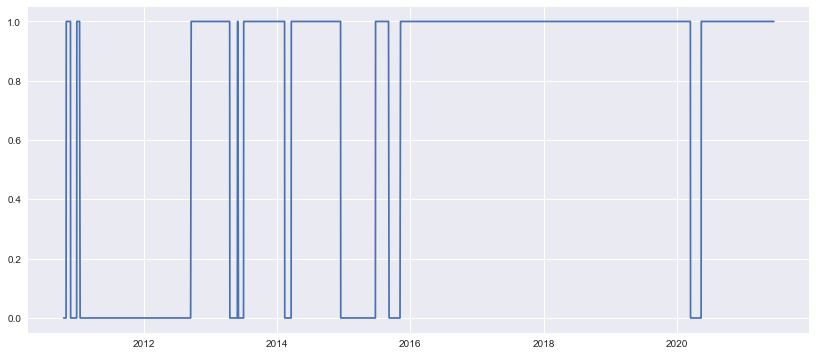

In [6]:
df.dropna(inplace=True)
plt.figure(figsize=(14,6))
plt.plot(df['position'])
df

<ipython-input-7-fc2c185a358c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = np.log(df['Close']/df['Close'].shift(1))


<AxesSubplot:>

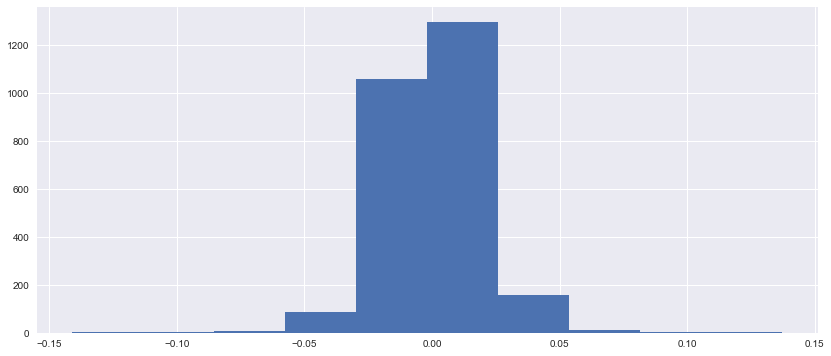

In [7]:
df['returns'] = np.log(df['Close']/df['Close'].shift(1))
df['returns'].hist(bins=10, figsize=(14,6))

In [8]:
df['strategy'] = df['position'].shift(1)*df['returns']
df[['strategy', 'returns']].sum()

<ipython-input-8-fc28b2542185>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strategy'] = df['position'].shift(1)*df['returns']


strategy    0.502891
returns     1.454685
dtype: float64

In [9]:
df[['strategy', 'returns']].sum().apply(np.exp)

strategy    1.653495
returns     4.283133
dtype: float64

<AxesSubplot:xlabel='Date'>

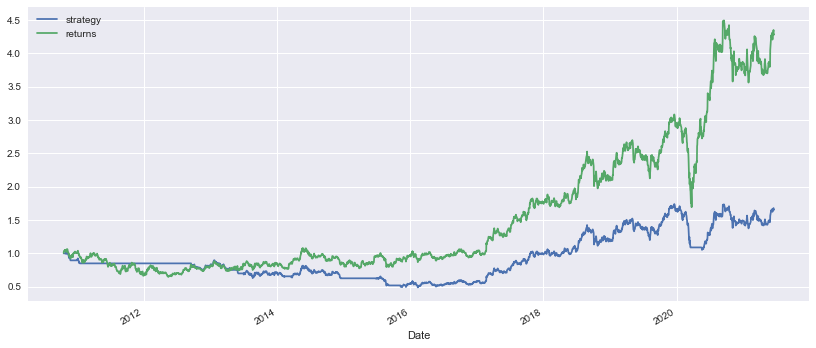

In [10]:
df[['strategy','returns']].cumsum().apply(np.exp).plot(figsize=(14,6))

In [11]:
df[['returns', 'strategy']].mean()*252

returns     0.139703
strategy    0.048296
dtype: float64

In [12]:
np.exp(df[['returns', 'strategy']].mean()*252)-1

returns     0.149932
strategy    0.049481
dtype: float64

In [13]:
df[['returns', 'strategy']].std()*252**0.5

returns     0.288838
strategy    0.227459
dtype: float64

In [14]:
(df[['returns', 'strategy']].apply(np.exp) - 1).std()*252**0.5

returns     0.289438
strategy    0.227160
dtype: float64

In [15]:
df['cumret'] = df['strategy'].cumsum().apply(np.exp)

<ipython-input-15-89e6521bf54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumret'] = df['strategy'].cumsum().apply(np.exp)


In [16]:
df['cummax'] = df['cumret'].cummax()

<ipython-input-16-28e22db7f057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cummax'] = df['cumret'].cummax()


<AxesSubplot:xlabel='Date'>

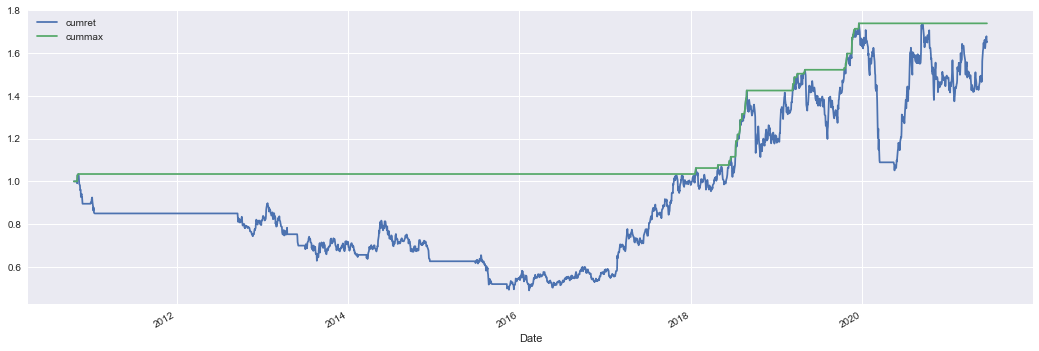

In [17]:
df[['cumret', 'cummax']].dropna().plot(figsize=(18,6))

In [18]:
drawdown = df['cummax'] - df['cumret']
drawdown.max()
drawdown

Date
2010-10-19         NaN
2010-10-20    0.000000
2010-10-21    0.000000
2010-10-22    0.000000
2010-10-25    0.000000
                ...   
2021-06-11    0.087885
2021-06-14    0.064190
2021-06-15    0.060384
2021-06-16    0.089041
2021-06-17    0.086019
Length: 2625, dtype: float64

In [19]:
temp = drawdown[drawdown ==0]
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())
periods[12:15]
periods.max()

datetime.timedelta(days=2632)

In [20]:
from scipy.optimize import brute
class SMAVectorBacktester(object):
    def __init__(self, symbol, EMA1, EMA2, start, end):
        self.symbol = symbol
        self.EMA1 = EMA1
        self.EMA2 = EMA2
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
    
    def get_data(self):
        df = yf.download(f'{self.symbol}.NS', self.start, self.end)
        df['returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
        df['EMA1'] = ta.EMA(df['Adj Close'], self.EMA1)
        df['EMA2'] = ta.EMA(df['Adj Close'], self.EMA2) 
        self.data = df
    
    def set_parameters(self, EMA1=None, EMA2=None):
        if EMA1 is not None:
            self.EMA1 = EMA1
            self.data['EMA1'] = ta.EMA(self.data['Adj Close'], timeperiod = self.EMA1)
        if EMA2 is not None:
            self.EMA2 = EMA2
            self.data['EMA2'] = ta.EMA(self.data['Adj Close'], timeperiod = self.EMA2)
    
    def run_strategy(self):
        data = self.data.copy().dropna()
        data['position'] = np.where(data['EMA1'] > data['EMA2'],1,-1)
        data['strategy'] = data['position'].shift(1)*data['returns']
        data.dropna(inplace = True)
        data['creturns'] = data['returns'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        #gross performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        #out performance of the strategy
        operf = aperf - data['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)
    
    def plot_results(self):
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | EMA1 = %d, EMA = %d' % (self.symbol, self.EMA1, self.EMA2)
        self.results[['creturns', 'cstrategy']].plot(title = title, figsize = (14,6))
        
    def update_and_run(self, EMA):
        self.set_parameters(int(EMA[0]), int(EMA[1]))
        return -self.run_strategy()[0]
    
    def optimize_parameters(self, EMA1_range, EMA2_range):
        opt = brute(self.update_and_run, (EMA1_range, EMA2_range), finish = None)
        return opt, -self.update_and_run(opt)
        
        

[*********************100%***********************]  1 of 1 completed


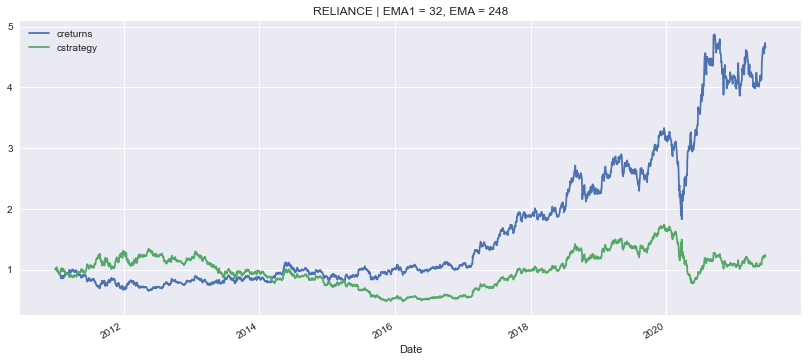

In [25]:
smabt = SMAVectorBacktester('RELIANCE', 50, 200, '2010-01-01', '2021-06-18')
smabt.run_strategy()
# %%time
smabt.optimize_parameters((30,50,2),(50,300,2))
smabt.plot_results()